In [2]:
# This code block is necessary only when using `ggsolver:v0.1` or `ggsolver:devel` docker images.
import sys
sys.path.append('/home/ggsolver/')

In [3]:
# For displaying images in jupyter notebook

from IPython.display import Image
from IPython.core.display import HTML

# Simple Game.

Jobstmann Example: We have seen this in class.


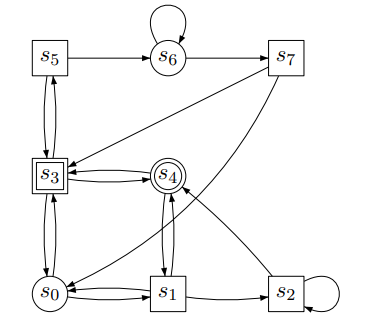

In [4]:
Image("/home/ggsolver/examples/fmr22_lec14/jobstmann.png")

 ## Question 1: What type of game is it?


In [5]:
states = list(range(8))
actions = [(0, 1), (0, 3), (1, 0), (1, 2), (1, 4), (2, 4), (2, 2), (3, 0), (3, 4), (3, 5), (4, 1), (4, 3), (5, 3),
                (5, 6), (6, 6), (6, 7), (7, 0), (7, 3)]
trans_dict = {
    0: {(0, 1): 1, (0, 3): 3},
    1: {(1, 0): 0, (1, 2): 2, (1, 4): 4},
    2: {(2, 4): 4, (2, 2): 2},
    3: {(3, 0): 0, (3, 4): 4, (3, 5): 5},
    4: {(4, 1): 1, (4, 3): 3},
    5: {(5, 3): 3, (5, 6): 6},
    6: {(6, 6): 6, (6, 7): 7},
    7: {(7, 0): 0, (7, 3): 3},
}
atoms = [f"p{i}" for i in states]
label = {i: "p{i}" for i in states}

In [6]:
import ggsolver.dtptb as dtptb

game = dtptb.DTPTBGame(states=states, actions=actions, trans_dict=trans_dict, atoms=atoms, label=label)

ERROR:root:[ERROR] logic.pl could not be loaded. Logic functionality will not work. 
Error: cannot import name 'Automaton' from partially initialized module 'ggsolver.models' (most likely due to a circular import) (/home/ggsolver/ggsolver/models.py)


## What objective do we want to solve for?

Let's choose to visit state 3 or 4. What logic do we need?

In [7]:
from ggsolver.logic.ltl import ScLTL

objective = ScLTL("Fp3 | Fp4")
dfa = objective.translate()
dfa

[INFO] Translating Fp3 | Fp4 with options=('Buchi', 'Deterministic', 'High', 'Complete', 'Unambiguous', 'SBAcc').


# How to solve the game?

In [8]:
prod = dtptb.ProductWithDFA(game, dfa)

In [9]:
prod.states()

[(0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (2, 0),
 (2, 1),
 (3, 0),
 (3, 1),
 (4, 0),
 (4, 1),
 (5, 0),
 (5, 1),
 (6, 0),
 (6, 1),
 (7, 0),
 (7, 1)]

In [10]:
prod.actions()

[(0, 1),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 4),
 (2, 4),
 (2, 2),
 (3, 0),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 3),
 (5, 3),
 (5, 6),
 (6, 6),
 (6, 7),
 (7, 0),
 (7, 3)]